In [1]:
#  For sting e changes I made in python files

In [1]:
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
import pickle
from mpl_toolkits import mplot3d
from scipy.interpolate import UnivariateSpline
from constants import pdm_constants

In [2]:
config["general"]["detector"] = "IceCube"
config["general"]["year"] = 7

#s = Signal(Ae, dm, dete)
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
angle = config['atmospheric showers']['theta angles']
#angle_grid = config['atmospheric showers']['theta angles']

In [3]:
b = Atm_Shower()

In [4]:
dm = DM2Nu()
const = pdm_constants()

In [7]:
flux_galactic = np.array([[dm.galactic_flux(b.egrid, m, sv, config['simulation parameters']["DM type k"],
            const.J_d + const.J_p + const.J_s) for sv in sv_grid] for m in mass_grid])
flux_extra = np.array([[dm.extra_galactic_flux(b.egrid, m, sv) for sv in sv_grid] for m in mass_grid])

/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:346: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:347: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd


In [8]:
background_po = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/background_pone.pkl','rb'))
eff_area = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/eff_area_ice.pkl','rb')) 
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/background_ice.pkl','rb'))

In [8]:
#signal = np.array([[s.signal_calc(Ae.egrid,mass,sv,angle) for sv in sv_grid] for mass in mass_grid])

In [9]:
#pdm = PDM()

In [9]:
#signal_m = pdm.signal
signal_m = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/limits_signal_IceCube.pkl','rb'))

In [16]:
#limits = pdm.results['numu']
limits = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/limits_results_IceCube.pkl','rb'))
cl_lit = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
m_1e4 = np.loadtxt("../data/m_1e4.csv",delimiter=",")
m_1e4 = (m_1e4[m_1e4[:, 0].argsort()])

Text(0.5, 0, '$m_{x}$ [GeV]')

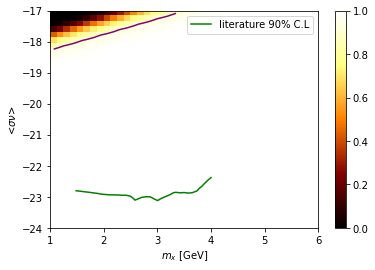

In [10]:
plt.imshow( limits, extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                              min(np.log10(sv_grid)), max(np.log10(sv_grid))),
                     origin='lower', aspect='auto',cmap=plt.cm.afmhot)
plt.colorbar()
plt.contour(limits, levels=[0.9], colors='purple',
                origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))  #  origin!!!!!!!!!!
plt.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')

plt.legend()
plt.ylabel(r'<$\sigma \nu$>')
plt.xlabel(r'$m_{x}$ [GeV]')

In [26]:
mass_id = 20
sv_id = 0
#limits[-9:]*b.egrid**2

Text(0, 0.5, 'Effective Area [$m^2$]')

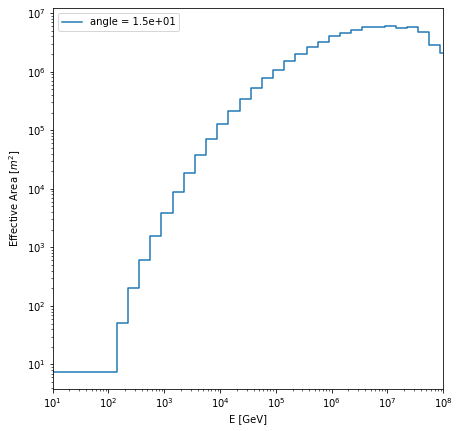

In [12]:
plt.figure(figsize=(7,7))
plt.step(b.egrid,eff_area[angle[15]],label=r'angle = %.1e' %angle[15])
#plt.step(b.egrid,background_po['numu'],label='Background P-ONE')
#plt.step(b.egrid,background_ic['numu'],label='Background IceCube')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e8)
#plt.ylim(1,1e7)
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'Effective Area [$m^2$]')

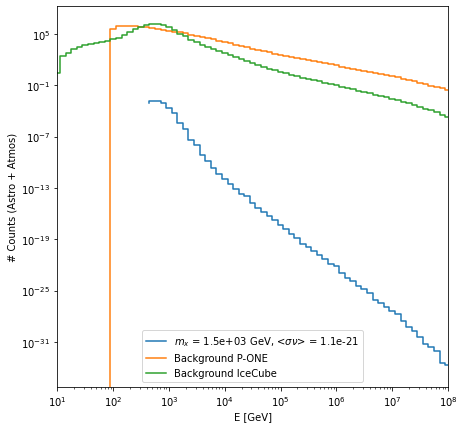

In [13]:
plt.figure(figsize=(7,7))
plt.step(b.egrid[-len(signal_m[mass_id][sv_id]):],signal_m[mass_id][sv_id],label=r'$m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
plt.step(b.egrid,background_po['numu'],label='Background P-ONE')
plt.step(b.egrid,background_ic['numu'],label='Background IceCube')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e8)
#plt.ylim(1,1e7)
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel('# Counts (Astro + Atmos)')
plt.savefig('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pics/counts_%.1e_%.1e'%(mass_grid[mass_id],sv_grid[sv_id])+'.png',
           bbox_inches='tight', dpi=500)


In [14]:
# plt.bar(np.log10(x._egrid), test['numu'])
# #plt.bar(np.log10(x._egrid), integrated_grid_astro)
# plt.yscale("log")
# plt.ylim(1., 1e3)
# plt.xlim(4, 6.5)

Text(0, 0.5, '$E^2$ $d\\phi/dE$')

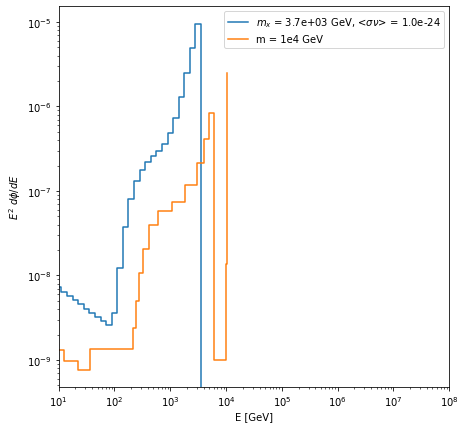

In [27]:
plt.figure(figsize=(7,7))
plt.step(b.egrid,flux_extra[mass_id][sv_id]*b.egrid**2,label=r'$m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
#plt.step(b.egrid,background_po['numu'],label='Background P-ONE')
#plt.step(b.egrid,background_ic['numu'],label='Background IceCube')
plt.step(m_1e4[:, 0], m_1e4[:, 1],label="m = 1e4 GeV")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e8)
#plt.ylim(1,1e7)
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2$ $d\phi/dE$')